# Loopy labels

Sometimes we want to plot in a form loop and add labels to a set of lines.

If one sets a label to each iteration in the loop it can often lead to a messy plot with repeated labels in the legend:

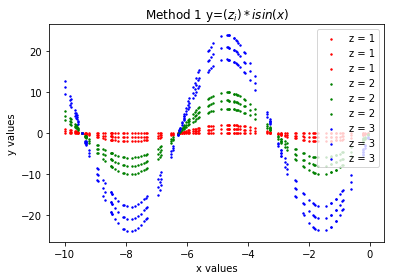

In [27]:
# notebook
%matplotlib inline
# imports 
import matplotlib.pyplot as plt
import numpy as np

# set up some fake data
x = np.random.uniform(-10, 0, size=100)
z = [1, 1, 1, 2, 2, 2, 3, 3, 3]
# set up some colors for each z value
colors = ['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b']

# set up plot (1 row and 1 column grid)
fig, frame = plt.subplots(ncols=1, nrows=1)

# loop around z values and plot each set of x data
for it in range(len(z)):
    # set up a label
    label = 'z = {0}'.format(z[it])
    # our y value
    y = z[it] * it * np.sin(x)
    # plot some function of y
    frame.scatter(x, y, color=colors[it], label=label,
                  s=2)
# set axis labels
frame.set(xlabel='x values', ylabel=r'y values',
          title='Method 1 y=$(z_{i}) * isin(x)$')


# add a legend
frame.legend(loc=0)


There are two ways to deal with this so we only have one of each z value in the legend.

The first way is to deal with it in the plotting for loop:

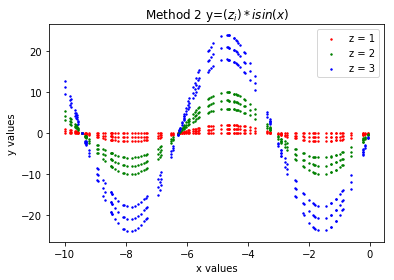

In [31]:
# set up plot (1 row and 1 column grid)
fig, frame = plt.subplots(ncols=1, nrows=1)

# loop around z values and plot each set of x data
used = []
for it in range(len(z)):
    # set up a label (set to None if we have it)
    if z[it] in used:
        label = None
    else:
        label = 'z = {0}'.format(z[it])
        used.append(z[it])
    # our y value
    y = z[it] * it * np.sin(x)
    # plot some function of y
    frame.scatter(x, y, color=colors[it], label=label,
                  s=2)
# set axis labels
frame.set(xlabel='x values', ylabel=r'y values',
          title='Method 2 y=$(z_{i}) * isin(x)$')

# add a legend
frame.legend(loc=0)

This may not be a good option or one may require more complicated control criteria for handling labels in the legend.

Luckily there is a way to access the legend information once the plots have been generated, and then one can manipulate the legend labels to ones purpose.

This is done by first getting the labels (the strings that were added with the `labels=` command) and the handles (handles are the matplotlib container for the positions, colours etc of the plotted lines) using the frame.get_legend_handles_labels() command.

Note if you don't have the frame (ax created by plt.subplot/plt.subplots/plt.subplot2grid you can get it by using plt.gca())

Then we can use a for loop to keep only the needed labels (i.e. the unique labels).

These are then added back into frame.legend as the primary arguments in the plt.legend or frame.legend call.

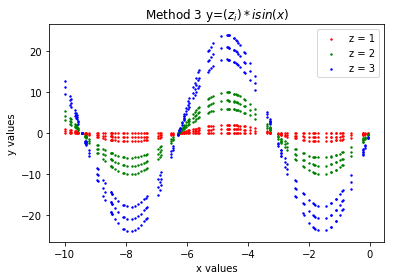

In [30]:

# -------------------------------------------------------
# 1. Plot the graph
# -------------------------------------------------------
# set up plot (1 row and 1 column grid)
fig, frame = plt.subplots(ncols=1, nrows=1)
# loop around z values and plot each set of x data
for it in range(len(z)):
    # set up a label (set to None if we have it)
    label = 'z = {0}'.format(z[it])
    # our y value
    y = z[it] * it * np.sin(x)
    # plot some function of y
    frame.scatter(x, y, color=colors[it], label=label,
                  s=2)
# set axis labels
frame.set(xlabel='x values', ylabel=r'y values',
          title='Method 3 y=$(z_{i}) * isin(x)$')

# -------------------------------------------------------
# 2. manipulate legend labels
# -------------------------------------------------------
# storage for unique handles and labels
uhandles, ulabels = [], []
# get the handles and labels:
#     if you need ax: 
#         frame = plt.gca()
handles, labels = frame.get_legend_handles_labels()
# loop around and keep only unique labels
for it in range(len(labels)):
    if labels[it] not in ulabels:
        uhandles.append(handles[it])
        ulabels.append(labels[it])

# -------------------------------------------------------
# 3. Add the legend with new handles/labels
# -------------------------------------------------------
# add a legend
frame.legend(uhandles, ulabels, loc=0)
